In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/food_order.csv')

# CREATING A COPY OF DATAFRAME
df_original_file = df.copy()

columns = df.columns
columns



old_values = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']
new_values = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joes Shanghai", 'Dirty Bird To Go', 'Cafe China']


df['restaurant_name'] = df['restaurant_name'].replace(old_values, new_values)


In [ ]:
# CHECKING FOR NULL VALUES
df.isnull().sum()
df.restaurant_name.unique()

In [26]:
old_values = ['Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Chipotle Mexican Grill $1.99 Delivery', "Joe's Shanghai \x8e_À\x8eü£¾÷´", 'Dirty Bird To Go (archived)', 'CafÌ© China']
new_values = ['Big Wong Restaurant', 'Empanada Mama', 'Chipotle Mexican Grill', "Joes Shanghai", 'Dirty Bird To Go', 'Cafe China']

# REPLACE TYPO NAMEs
df['restaurant_name'] = df['restaurant_name'].replace(old_values, new_values)
df[df['restaurant_name'].isin(old_values)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


In [27]:
#CHECKING DAY_OF_THE_WEEK
df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

In [28]:
#CHECKING RATING
df.rating.value_counts(normalize=True)* 100

Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: rating, dtype: float64

In [29]:
# 39% OF ORDERS RATING ARE 'NOT GIVEN'
# NEW COLUMN RATING_NEW TO REPLACE 'NOT GIVEN' WITH NaN
df['rating_new'] = df['rating'].replace('Not given', np.nan).astype(float)

In [30]:
#CONFIRMING NEW COLUMN RATING_NEW
df['rating_new'].isnull().sum()
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0


In [31]:
# NEW COLUMN WILL BE SUM OF FOOD PREP TIME AND DELIVERY TIME
df['order_completion_time'] = df['food_preparation_time'] + df['delivery_time']

#CONFIRMING NEW COLUMN ORDER_COMPLETION_TIME
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_new,order_completion_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0,49


In [32]:
# CHECKING FOR DUPLICATE RECORDS
df.duplicated().sum()

0

In [33]:
# CHECKING NUMBERS OF ORDER IDS
df.order_id.nunique()

1898

In [34]:
#CHECKING NUMBERS OF CUSTOMERS
df.customer_id.nunique()

1200

In [35]:
# 1. WHAT THE MOST ORDERED CUSINE TYPE?

#CHECKING HOW MANY DIFFERENT TYPE OF CUSINE
df.groupby("cuisine_type").ngroups

14

In [40]:
#CHECKING HOW MANY ORDER PER TYPE OF CUSINE
df.groupby("cuisine_type").size()

cuisine_type
American          584
Chinese           215
French             18
Indian             73
Italian           298
Japanese          470
Korean             13
Mediterranean      46
Mexican            77
Middle Eastern     49
Southern           17
Spanish            12
Thai               19
Vietnamese          7
dtype: int64

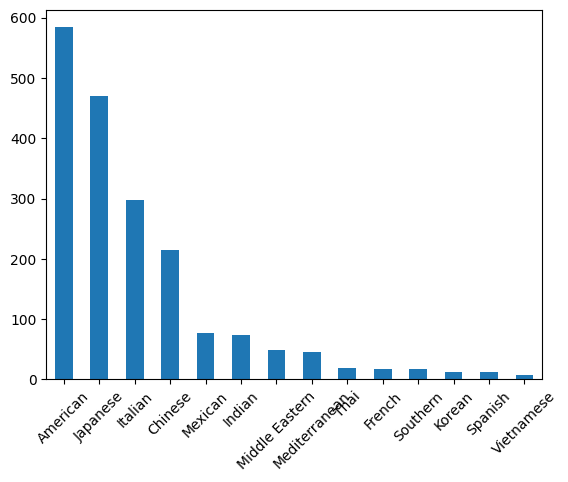

In [42]:
chart = df.cuisine_type.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

In [43]:
# ORDER PERCENTAGE BY TYPE OF CUSINE
df['cuisine_type'].value_counts(normalize=True)*100

American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64

In [44]:
# 2. WHATS THE AVERAGE COST PER MEAL?

# ANALYZING COST OF ORDERS
df.cuisine_type.value_counts()
df.groupby('cuisine_type')['cost_of_the_order'].mean()

cuisine_type
American          16.319829
Chinese           16.305209
French            19.793889
Indian            16.919726
Italian           16.418691
Japanese          16.304532
Korean            14.001538
Mediterranean     15.474783
Mexican           16.933117
Middle Eastern    18.820612
Southern          19.300588
Spanish           18.994167
Thai              19.207895
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64

In [45]:
df.cost_of_the_order.describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [46]:
# 3. WHATS THE BUSSIEST DAY OF THE WEEK?

most_ordered_day_week = df.groupby('day_of_the_week').count()
most_ordered_day_week = most_ordered_day_week.reset_index('day_of_the_week')
most_ordered_day_week

,day_of_the_week,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,rating,food_preparation_time,delivery_time,rating_new,order_completion_time
0,Weekday,547,547,547,547,547,547,547,547,340,547
1,Weekend,1351,1351,1351,1351,1351,1351,1351,1351,822,1351


[Text(0.5, 0, 'Day of the Week'), Text(0, 0.5, 'Total Order')]

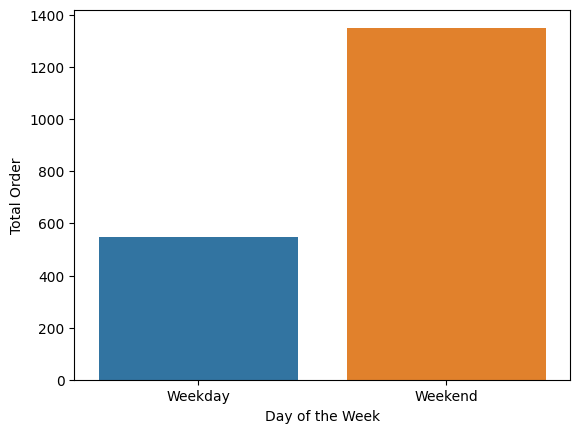

In [47]:
# BAR GRAPH
most_ordered_day_week_plot = sns.barplot(x='day_of_the_week', y='order_id', data= most_ordered_day_week)
most_ordered_day_week_plot.set(xlabel='Day of the Week', ylabel='Total Order')

In [57]:
# 4. WHATS THE AVERAGE DELIVERY TIME?
df.delivery_time.describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [48]:
# DELIVERY TIME FOR CUISINE TYPE
average_meal_delivery_time = df.groupby('cuisine_type').mean()
average_meal_delivery_time = average_meal_delivery_time.reset_index('cuisine_type')
average_meal_delivery_time

<ipython-input-48-4be0375dbc00>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_meal_delivery_time = df.groupby('cuisine_type').mean()


,cuisine_type,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,rating_new,order_completion_time
0,American,1.477489e+06,184169.683219,16.319829,27.440068,24.193493,4.298913,51.633562
1,Chinese,1.477530e+06,180480.855814,16.305209,27.511628,23.855814,4.338346,51.367442
2,French,1.477438e+06,158138.722222,19.793889,26.888889,25.333333,4.300000,52.222222
3,Indian,1.477493e+06,162106.397260,16.919726,27.109589,24.082192,4.540000,51.191781
4,Italian,1.477528e+06,159568.305369,16.418691,27.483221,24.567114,4.360465,52.050336
5,Japanese,1.477485e+06,161493.955319,16.304532,27.510638,24.131915,4.373626,51.642553
6,Korean,1.477426e+06,226702.000000,14.001538,25.461538,20.923077,4.111111,46.384615
7,Mediterranean,1.477483e+06,115908.130435,15.474783,27.000000,23.586957,4.218750,50.586957
8,Mexican,1.477446e+06,181453.545455,16.933117,26.727273,24.389610,4.416667,51.116883
9,Middle Eastern,1.477412e+06,168839.938776,18.820612,26.673469,24.081633,4.235294,50.755102


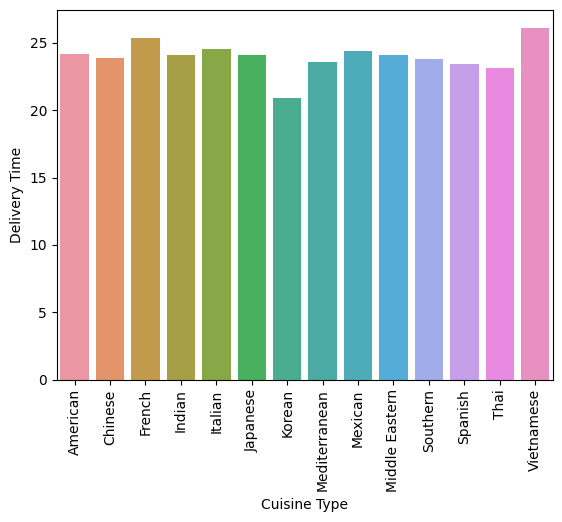

In [49]:
average_meal_delivery_time_plot = sns.barplot(x='cuisine_type', y='delivery_time', data=average_meal_delivery_time)
plt.setp(average_meal_delivery_time_plot.get_xticklabels(), rotation=90)
average_meal_delivery_time_plot.set(xlabel='Cuisine Type', ylabel='Delivery Time')
plt.show()

In [50]:
# 5. WHATS AVERAGE MEAL PREPARATION TIME?
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

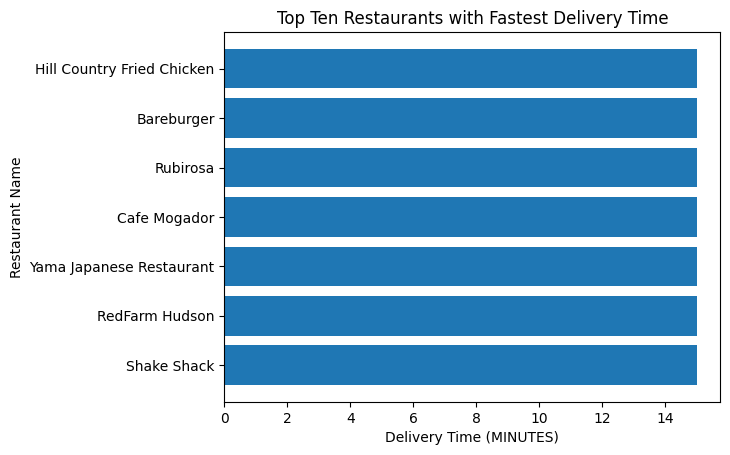

In [60]:
# 6. TOP TEN RESTAURANT WITH FASTEST DELIVERY TIME

df_sorted = df.sort_values(by='delivery_time')

top_ten = df_sorted.head(10)

# CREATE A HORIZONTAL BAR CHART
plt.barh(top_ten['restaurant_name'], top_ten['delivery_time'])
plt.xlabel('Delivery Time (MINUTES)')
plt.ylabel('Restaurant Name')
plt.title('Top Ten Restaurants with Fastest Delivery Time')

plt.show()

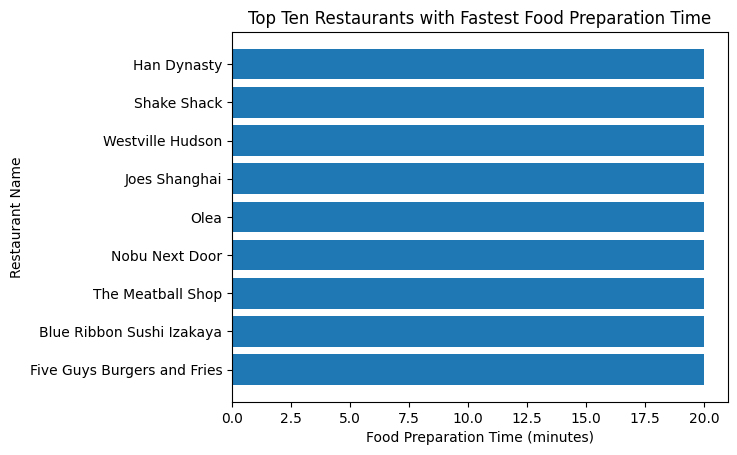

In [52]:
# 7.TOP TEN RESTURANT WITH THE FASTEST PREPARATION TIME

# Sort the DataFrame by food preparation time and select the top ten rows
df_sorted = df.sort_values(by='food_preparation_time')
top_ten = df_sorted.head(10)

# Create a horizontal bar chart
plt.barh(top_ten['restaurant_name'], top_ten['food_preparation_time'])
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Restaurant Name')
plt.title('Top Ten Restaurants with Fastest Food Preparation Time')

# Show the plot
plt.show()

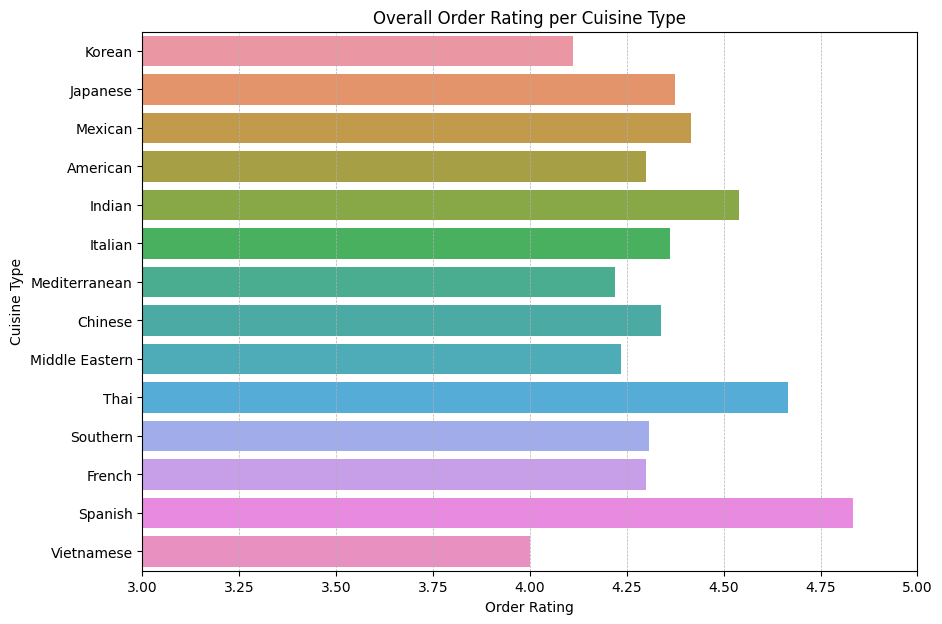

In [56]:
# 8. RESTAURANT RATING BY CUISINE
plt.figure(figsize=(10,7))
sns.barplot(data=df, y='cuisine_type', x='rating_new', errorbar=('ci', False))
plt.xlabel('Order Rating')
plt.ylabel('Cuisine Type')
plt.xlim(3,5)
plt.xticks(np.arange(3,5.25,.25))
plt.title('Overall Order Rating per Cuisine Type')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()